In [2]:
import pandas as pd
import numpy as np

# Question 1

In [5]:
#The graph has both trend and seasonality

# Question 2

In [155]:
#f1 = y1
#and hence f1 =25

In [156]:
alpha = 0.5
f2 = (alpha*25) + (alpha*25)
f2

25.0

In [157]:
f3 = (alpha*(-5) + alpha * 25)
f3

10.0

In [158]:
f4 = (alpha*10) + (alpha* 10)
f4

10.0

In [159]:
#Q3 value might be 10
#By using this method i could able to predict the q4

# QUESTION 3

In [3]:
wine = pd.read_csv('AusWineSales.csv')

In [4]:
wine.head()

,YearMonth,Red,Sparkling,Sweetwhite
0,1980-01,464,1686,85
1,1980-02,675,1591,89
2,1980-03,703,2304,109
3,1980-04,887,1712,95
4,1980-05,1139,1471,91


In [7]:
wine['YearMonth'] = pd.to_datetime(wine['YearMonth'])

In [8]:
wine.index = wine['YearMonth']
wine.head()

,YearMonth,Red,Sparkling,Sweetwhite
YearMonth,,,,
1980-01-01,1980-01-01,464,1686,85
1980-02-01,1980-02-01,675,1591,89
1980-03-01,1980-03-01,703,2304,109
1980-04-01,1980-04-01,887,1712,95
1980-05-01,1980-05-01,1139,1471,91


In [9]:
wine.drop('YearMonth',axis=1,inplace=True)

In [10]:
wine.head()

,Red,Sparkling,Sweetwhite
YearMonth,,,
1980-01-01,464,1686,85
1980-02-01,675,1591,89
1980-03-01,703,2304,109
1980-04-01,887,1712,95
1980-05-01,1139,1471,91


In [38]:
red = wine[['Red']]
sparkling = wine[['Sparkling']]
sweet = wine[['Sweetwhite']]


In [40]:
red.head()

,Red
YearMonth,
1980-01-01,464
1980-02-01,675
1980-03-01,703
1980-04-01,887
1980-05-01,1139


In [41]:
red.shape

(187, 1)

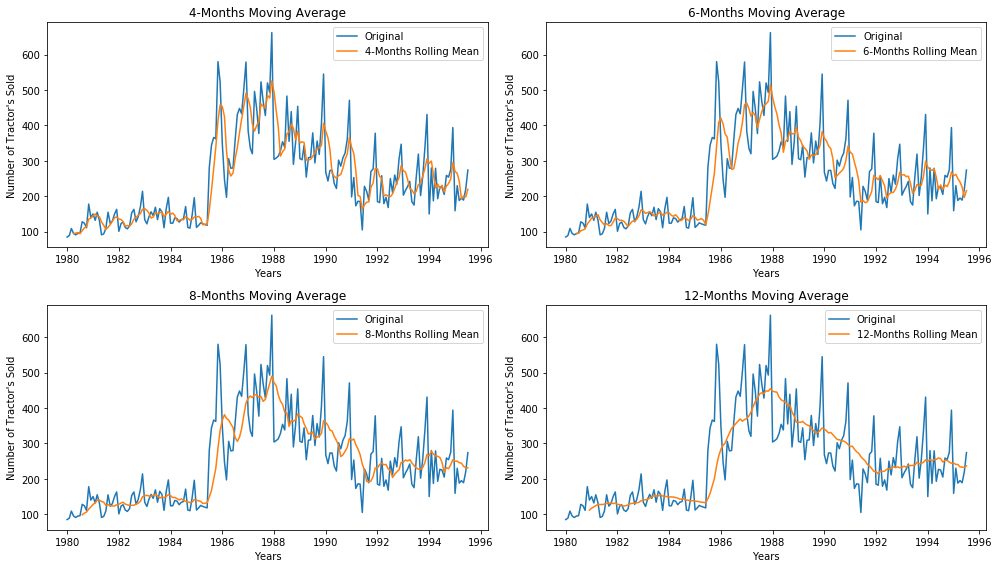

In [44]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sweet.index, sweet, label='Original')
axes[0][0].plot(sweet.index, sweet.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sweet.index, sweet, label='Original')
axes[0][1].plot(sweet.index, sweet.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sweet.index, sweet, label='Original')
axes[1][0].plot(sweet.index, sweet.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sweet.index, sweet, label='Original')
axes[1][1].plot(sweet.index, sweet.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()


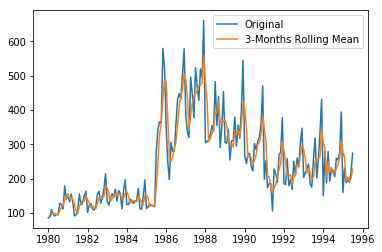

In [48]:
plt.plot(sweet.index, sweet, label='Original')
plt.plot(sweet.index, sweet.rolling(window=3).mean(), label='3-Months Rolling Mean')
plt.legend(loc='best')
plt.show()


In [79]:
red.head()

,Red
YearMonth,
1980-01-01,464
1980-02-01,675
1980-03-01,703
1980-04-01,887
1980-05-01,1139


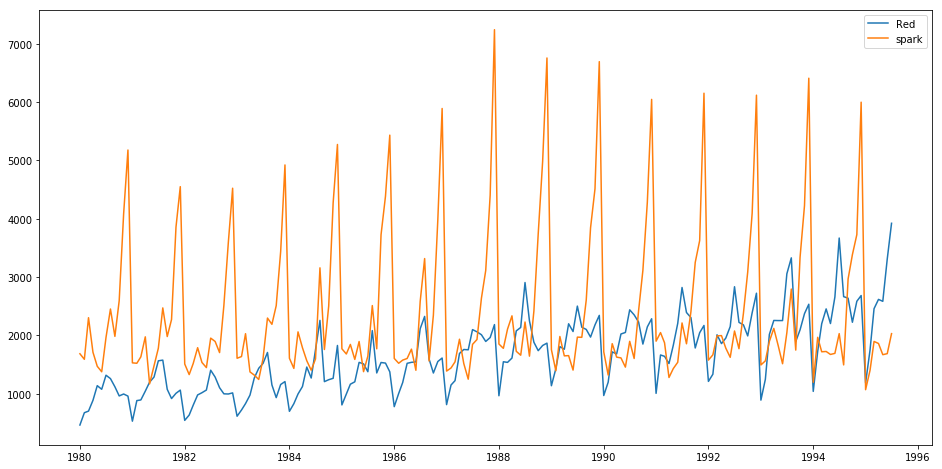

In [74]:
plt.figure(figsize=(16,8))
plt.plot(red['Red'], label='Red')
plt.plot(sparkling['Sparkling'], label='spark')
plt.legend(loc='best')

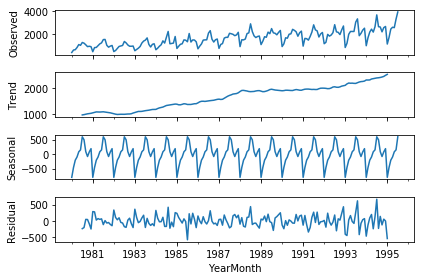

In [56]:
sm.tsa.seasonal_decompose(red.Red).plot()
plt.show()

In [154]:
#Red has a positive trend
#Has a clear seasonality with 2 peaks
#Multiplicative Seasonality

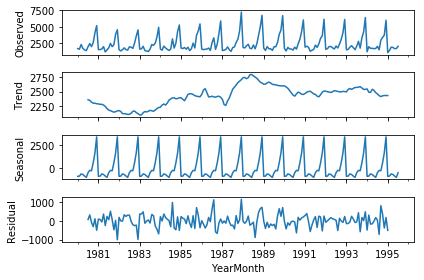

In [57]:
sm.tsa.seasonal_decompose(sparkling.Sparkling).plot()
plt.show()

In [58]:
#The trend varies from drops and then arises.
#The trend is not constant
#Seasonality hits the peak and drops suddenly
#Additive seasonality

In [59]:
from statsmodels.tsa.stattools import adfuller


In [61]:
dftest = adfuller(red.Red)
dftest

(0.9325860421378573,
 0.9935011829238276,
 11,
 175,
 {'1%': -3.4682803641749267,
  '5%': -2.8782017240816327,
  '10%': -2.5756525795918366},
 2377.6476321463924)

In [62]:
dftest1 = adfuller(sparkling.Sparkling)
dftest1

(-1.3604974548123367,
 0.6010608871634855,
 11,
 175,
 {'1%': -3.4682803641749267,
  '5%': -2.8782017240816327,
  '10%': -2.5756525795918366},
 2573.1222090270685)

In [63]:
dftest2 = adfuller(sweet.Sweetwhite)
dftest2

(-1.7173974216499897,
 0.422171826969536,
 13,
 173,
 {'1%': -3.4687256239864017,
  '5%': -2.8783961376954363,
  '10%': -2.57575634100705},
 1880.6778070857513)

In [69]:
#All the 3 data are not stationary
d = sweet['Sweetwhite'].diff(periods = 1)

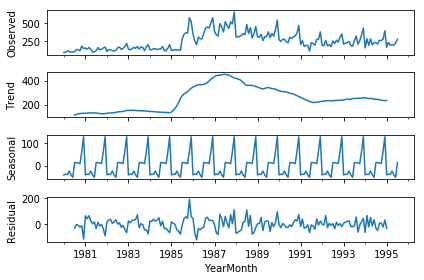

In [72]:
sm.tsa.seasonal_decompose(sweet['Sweetwhite']).plot()
plt.show()

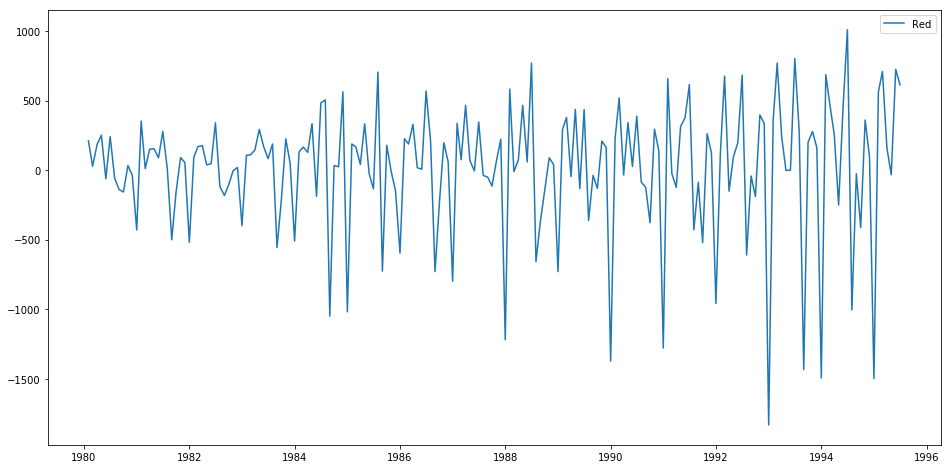

In [75]:
plt.figure(figsize=(16,8))
plt.plot(red['Red'].diff(periods = 1), label='Red')
#plt.plot(sparkling['Sparkling'].diff(periods=1), label='spark')
plt.legend(loc='best')

In [ ]:
#Red has multiplicative seasonality since the statistical property is not constant even after removing
#the trend

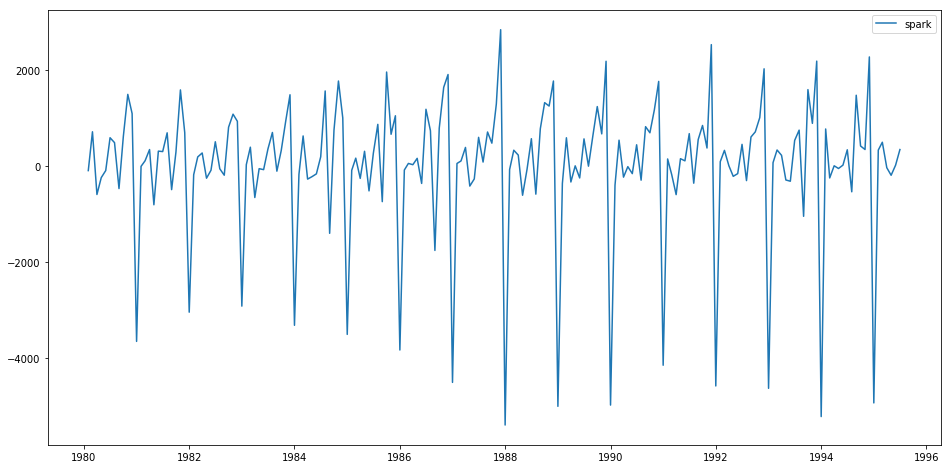

In [76]:
plt.figure(figsize=(16,8))
#plt.plot(red['Red'].diff(periods = 1), label='Red')
plt.plot(sparkling['Sparkling'].diff(periods=1), label='spark')
plt.legend(loc='best')

In [78]:
#Sparkling has additive seasonality since the statistical property is constant after removing
#the trend

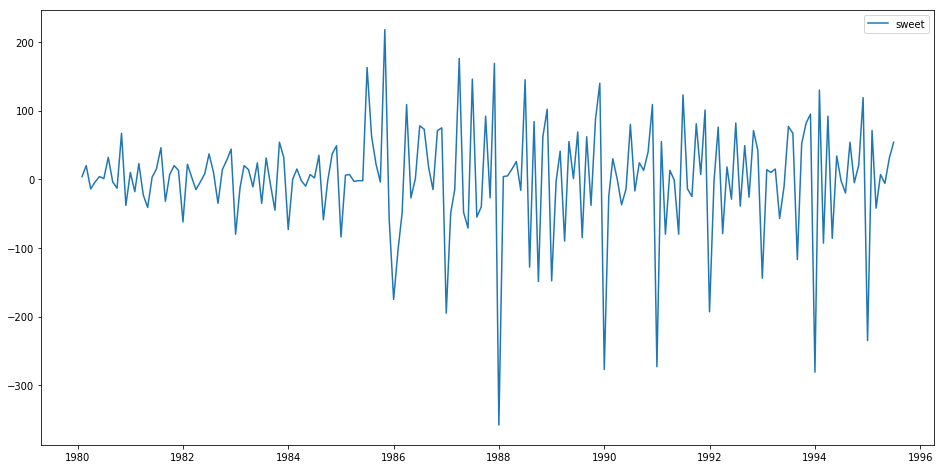

In [77]:
plt.figure(figsize=(16,8))
#plt.plot(red['Red'].diff(periods = 1), label='Red')
plt.plot(sweet['Sweetwhite'].diff(periods=1), label='sweet')
plt.legend(loc='best')

In [ ]:
#sweetwhite has multiplicative seasonality since the statistical property is not constant even after removing
#the trend

In [80]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")


import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
train = sparkling[0 : int(len(red)*0.7)]
test = sparkling[int(len(red)*0.7):]

In [84]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [91]:
model = SimpleExpSmoothing(train)
model

In [92]:
model_fit = model.fit(smoothing_level=0.6,optimized=False)

In [93]:
test['SES'] = model_fit.forecast(len(test))

In [95]:
test.shape

(57, 2)

In [97]:
test.head()

,Sparkling,SES
YearMonth,,
1990-11-01,4286,2717.871147
1990-12-01,6047,2717.871147
1991-01-01,1902,2717.871147
1991-02-01,2049,2717.871147
1991-03-01,1874,2717.871147


In [99]:
train.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


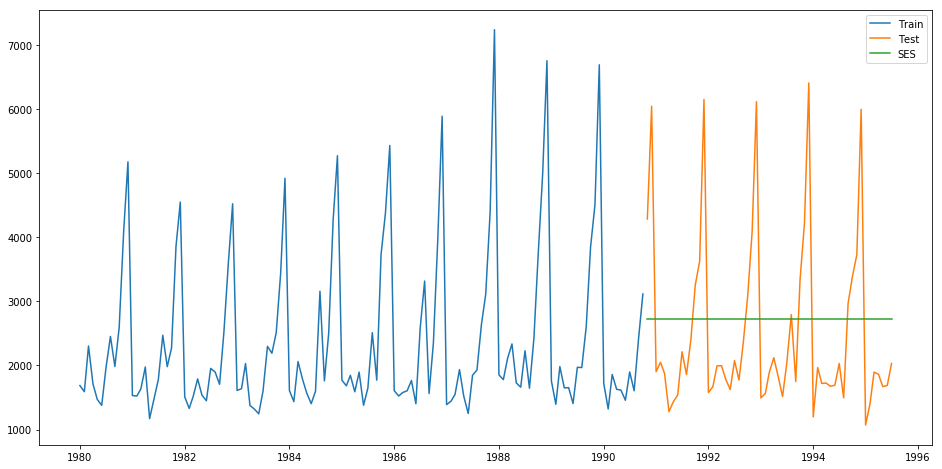

In [100]:
plt.figure(figsize=(16,8))
plt.plot(train.Sparkling, label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(test['SES'], label='SES')
plt.legend(loc='best')

In [103]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(test.Sparkling, test.SES))
rmse = round(rmse, 3)

In [104]:
rmse

1379.989

# HOLT WINTER

In [105]:
fit1 = Holt(np.asarray(train['Sparkling'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)

In [106]:
test['Holt_linear'] = fit1.forecast(len(test))

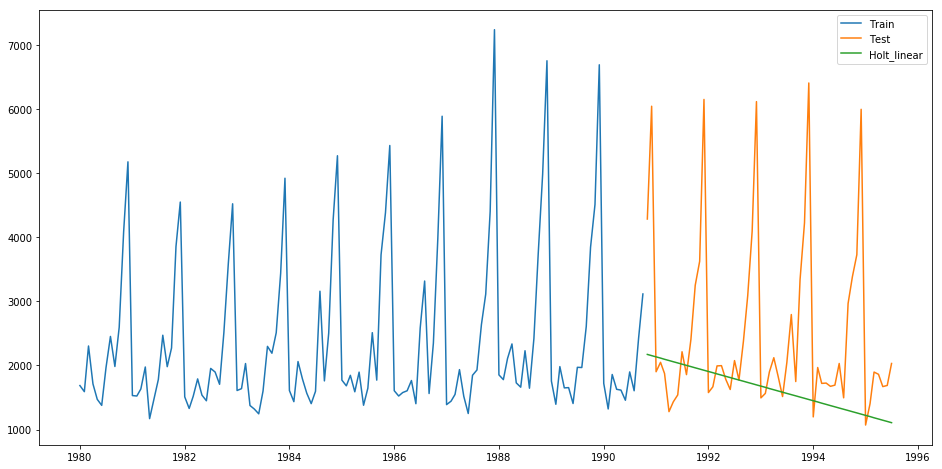

In [107]:
plt.figure(figsize=(16,8))
plt.plot(train.Sparkling, label='Train')
plt.plot(test.Sparkling, label='Test')
plt.plot(test.Holt_linear, label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [129]:
fit1 = ExponentialSmoothing(np.asarray(train['Sparkling']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()

In [130]:
test['Holt_Winter'] = fit1.forecast(len(test))

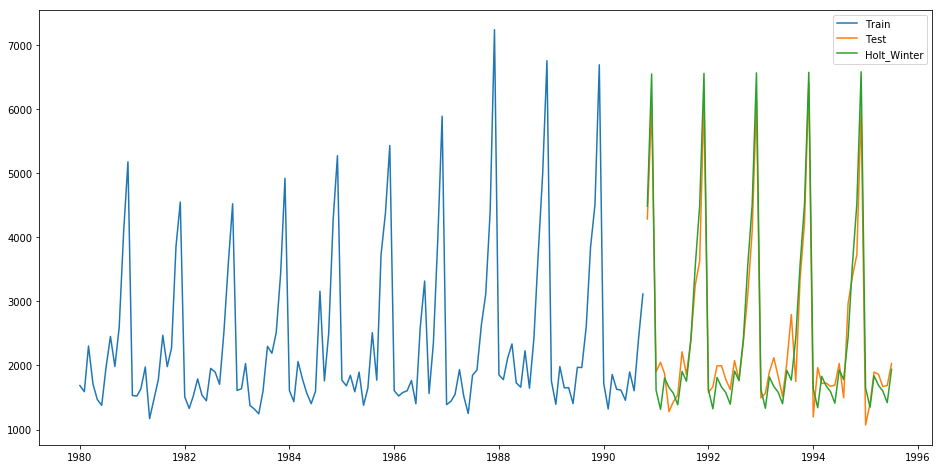

In [132]:
plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(test['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [131]:
rmse = np.sqrt(metrics.mean_squared_error(test.Sparkling, test['Holt_Winter']))
rmse = round(rmse, 3)
rmse

368.593

In [133]:
#Holt winter has the minimum rmse value and we can use this to forecast the next 12 months
fit2 = ExponentialSmoothing(np.asarray(sparkling['Sparkling']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()

In [134]:
forecasted = fit2.forecast(12)

In [135]:
forecasted

array([1884.9767881 , 2402.25851543, 3245.97725072, 3932.21322071,
       6119.72409657, 1266.11692819, 1583.64665395, 1821.82906446,
       1795.72944289, 1643.0548269 , 1576.94199352, 1975.09385779])